__Normal CNN training , Cleaned Data__



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Subset
import matplotlib.pyplot as plt
import numpy as np
import random
import torchvision.models as models  #For RESNET
#gogcolab
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
#same initialization of weights

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
torch.cuda.manual_seed_all(seed)

In [ ]:
'''transform = transforms.Compose([  #apply several transforms sequentially on all images !!
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) ]) #mean and std for each channel keeps pixel values in range [-1, 1]

#auto equal splittign of data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)'''


"transform = transforms.Compose([  #apply several transforms sequentially on all images !!\n    transforms.ToTensor(),\n    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) ]) #mean and std for each channel keeps pixel values in range [-1, 1]\n\n#auto equal splittign of data\ntrain_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)\ntest_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)"

In [ ]:
# Training transform: with data augmentation
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),     # flips image horizontally
    transforms.RandomRotation(10),              # random rotation in range [-10°, 10°]
    transforms.RandomResizedCrop(32, scale=(0.8, 1.0)),  # random zoom ndd crop
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Testing transform: normalize only
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

#auto equal splittign of data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)


In [ ]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               RandomResizedCrop(size=(32, 32), scale=(0.8, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
               ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=None)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [ ]:
'''import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Subset

# 1Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# 2 Download full CIFAR-10 datasets
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# 3 Select only airplane (0) and ship (8)
classes_to_keep = [0, 8]

train_indices = [i for i, label in enumerate(train_data.targets) if label in classes_to_keep]
test_indices = [i for i, label in enumerate(test_data.targets) if label in classes_to_keep]

# 4 Create filtered datasets
train_data = Subset(train_data, train_indices)
test_data = Subset(test_data, test_indices)


train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

print(f"Training samples: {len(train_data)} | Test samples: {len(test_data)}")
'''

'import torch\nimport torchvision\nimport torchvision.transforms as transforms\nfrom torch.utils.data import Subset\n\n# 1Define transforms\ntransform = transforms.Compose([\n    transforms.ToTensor(),\n    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))\n])\n\n# 2 Download full CIFAR-10 datasets\ntrain_data = torchvision.datasets.CIFAR10(root=\'./data\', train=True, download=True, transform=transform)\ntest_data = torchvision.datasets.CIFAR10(root=\'./data\', train=False, download=True, transform=transform)\n\n# 3 Select only airplane (0) and ship (8)\nclasses_to_keep = [0, 8]\n\ntrain_indices = [i for i, label in enumerate(train_data.targets) if label in classes_to_keep]\ntest_indices = [i for i, label in enumerate(test_data.targets) if label in classes_to_keep]\n\n# 4 Create filtered datasets\ntrain_data = Subset(train_data, train_indices)\ntest_data = Subset(test_data, test_indices)\n\n\ntrain_loader = DataLoader(train_data, batch_size=64, shuffle=True)\ntest_loader = DataLo

In [ ]:
train_data


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               RandomResizedCrop(size=(32, 32), scale=(0.8, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
               ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=None)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

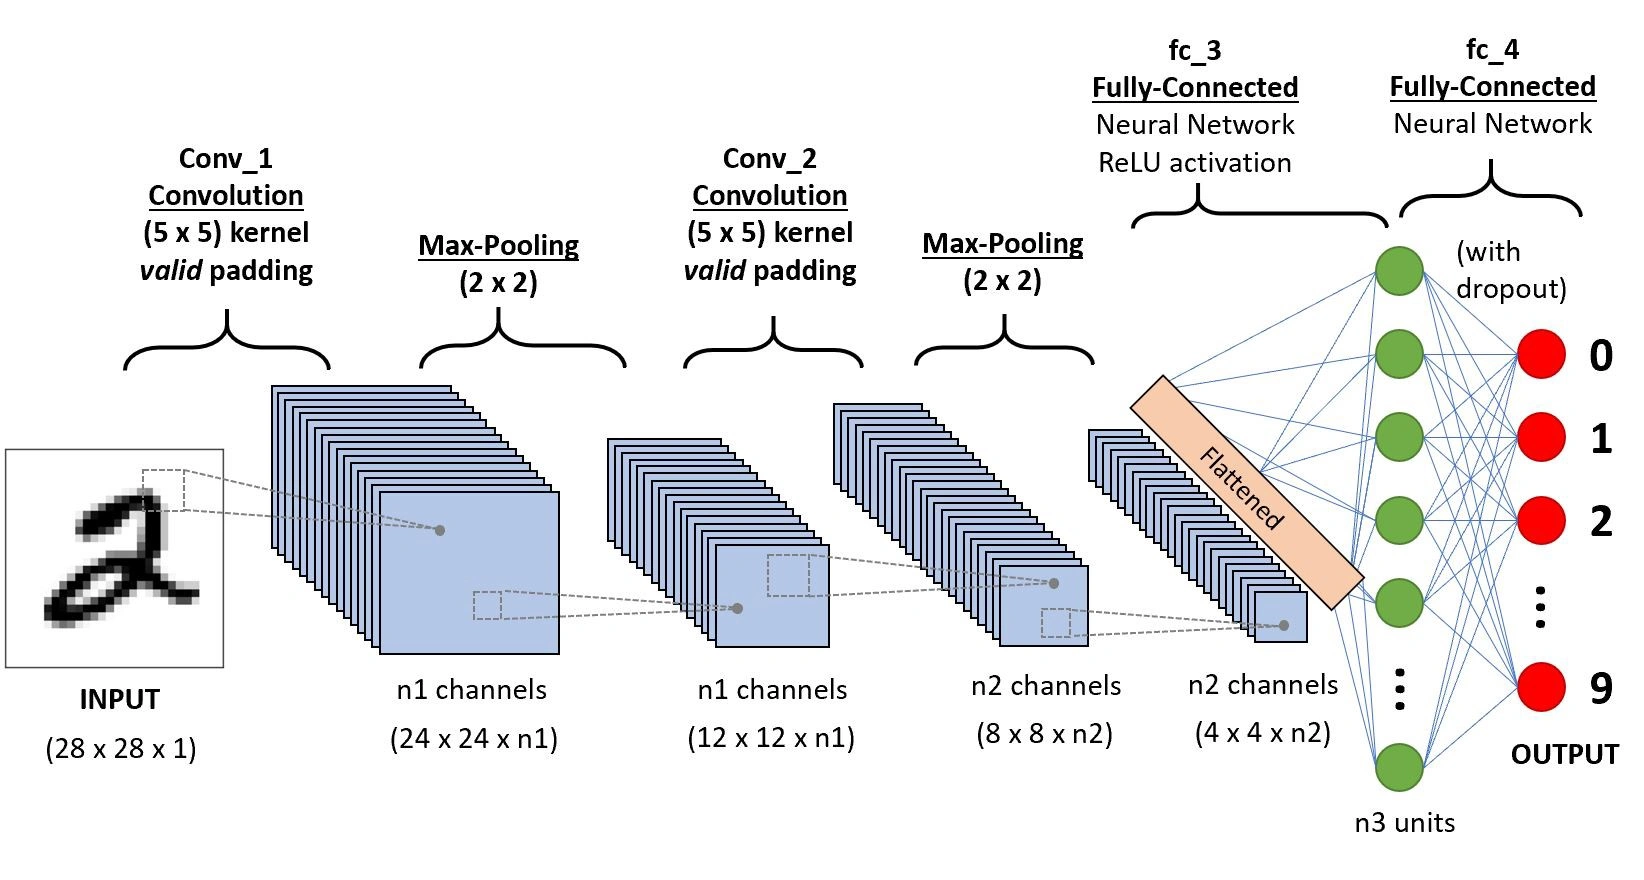

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)

        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)

        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)

        self.conv4 = nn.Conv2d(256, 128, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(128)

        # New added convolutional layer
        self.conv5 = nn.Conv2d(128, 128, 3, padding=1)
        self.bn5 = nn.BatchNorm2d(128)

        self.pool = nn.MaxPool2d(2, 2)

        # Flattened feature size = 512 * 1 * 1 = 512 (for 32x32 input after 5 pooling layers) anci
        self.fc1 = nn.Linear(128 * 1 * 1, 512)    # first hidden layer
        self.fc2 = nn.Linear(512, 256)            # second hidden layer (new)
        self.fc3 = nn.Linear(256, 128)            # third hidden layer
        #self.dropout = nn.Dropout(0.4)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)       # output layer

    def forward(self, x):
        # Feature extraction
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.pool(F.relu(self.bn5(self.conv5(x))))  # new conv layer

        # Flatten
        x = torch.flatten(x, 1)

        # Classification head
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))   # new hidden layer
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        #x = self.dropout(x)
        x = self.fc5(x)
        return x


In [ ]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size= 64, shuffle= False )

model = CNN().to(device)


#model = models.resnet50(pretrained=True)
# Replace the final layer (fc) for dataset (10 classes for CIFAR-10)
#num_ftrs = model.fc.in_features
#model.fc = nn.Linear(num_ftrs, 10)

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

In [ ]:
epochs = 50
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for images , labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)  #forw
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.4f}")


In [ ]:
model.eval()


CNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=128, out_features=512, bias=True)
  (fc2):

In [ ]:
test_correct = 0
test_total = 0
#eval per class

test_class_correct = [0]*10
test_class_total = [0]*10

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)      #batch size
        test_correct += (predicted == labels).sum().item() #tensor to int
        for i in range(len(labels)):
            label = labels[i]
            test_class_correct[label] += (predicted[i] == label).item()  # int 1 if corr
            test_class_total[label] += 1



In [ ]:
train_correct = 0
train_total = 0
train_class_correct = [0]*10
train_class_total = [0]*10

with torch.no_grad():
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        for i in range(len(labels)):
            label = labels[i]
            train_class_correct[label] += (predicted[i] == label).item()
            train_class_total[label] += 1


In [ ]:
print(f"Test  Accuracy: {100 * test_correct / test_total:.2f}%   |   Training  Accuracy: {100 * train_correct / train_total:.2f}%")
print(f" ")

print(f"{'  Class             |':} {'Test ':} | {'  Train':}")
print("="*45)

#each claass  !
for i in range(10):
    acc = 100 * test_class_correct[i] / test_class_total[i] if test_class_total[i] > 0 else 0
    acc_tr = 100 * train_class_correct[i] / train_class_total[i] if train_class_total[i] > 0 else 0
    print(f"{test_data.classes[i]:<10} {acc:15.2f}% | {acc_tr:15.2f}%")

Test  Accuracy: 86.58%   |   Training  Accuracy: 93.66%
 
  Class             | Test  |   Train
airplane             91.00% |           95.60%
automobile           95.60% |           98.52%
bird                 82.80% |           90.86%
cat                  66.30% |           85.62%
deer                 89.70% |           96.26%
dog                  78.20% |           90.00%
frog                 91.90% |           94.58%
horse                88.50% |           93.12%
ship                 90.40% |           96.58%
truck                91.40% |           95.48%


In [ ]:
import torch


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
model.load_state_dict(torch.load("/content/cnn_model_weight_aug_v5.pth"))  # assume saved on GPU or CPU
model.to(device)
model.train()  # important: set to train mode'''


CNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=128, out_features=512, bias=True)
  (fc2):

In [ ]:
num_epochs_to_continue = 10
for epoch in range(num_epochs_to_continue):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+51}/{50+10}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 51/60, Loss: 0.2094
Epoch 52/60, Loss: 0.2149
Epoch 53/60, Loss: 0.2127
Epoch 54/60, Loss: 0.2060
Epoch 55/60, Loss: 0.2123
Epoch 56/60, Loss: 0.2074
Epoch 57/60, Loss: 0.2087
Epoch 58/60, Loss: 0.2127
Epoch 59/60, Loss: 0.2105
Epoch 60/60, Loss: 0.2083


In [ ]:
test_correct = 0
test_total = 0
#eval per class

test_class_correct = [0]*10
test_class_total = [0]*10

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)      #batch size
        test_correct += (predicted == labels).sum().item() #tensor to int
        for i in range(len(labels)):
            label = labels[i]
            test_class_correct[label] += (predicted[i] == label).item()  # int 1 if corr
            test_class_total[label] += 1

In [ ]:
train_correct = 0
train_total = 0
train_class_correct = [0]*10
train_class_total = [0]*10

with torch.no_grad():
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        for i in range(len(labels)):
            label = labels[i]
            train_class_correct[label] += (predicted[i] == label).item()
            train_class_total[label] += 1


In [ ]:
print(f"Test  Accuracy: {100 * test_correct / test_total:.2f}%   |   Training  Accuracy: {100 * train_correct / train_total:.2f}%")
print(f" ")

print(f"{'  Class             |':} {'Test ':} | {'  Train':}")
print("="*45)

#each claass  !
for i in range(10):
    acc = 100 * test_class_correct[i] / test_class_total[i] if test_class_total[i] > 0 else 0
    acc_tr = 100 * train_class_correct[i] / train_class_total[i] if train_class_total[i] > 0 else 0
    print(f"{test_data.classes[i]:<10} {acc:15.2f}% | {acc_tr:15.2f}%")

Test  Accuracy: 86.75%   |   Training  Accuracy: 92.79%
 
  Class             | Test  |   Train
airplane             92.10% |           96.22%
automobile           95.40% |           98.00%
bird                 77.70% |           88.42%
cat                  70.10% |           84.00%
deer                 89.70% |           95.50%
dog                  80.70% |           90.44%
frog                 91.40% |           93.98%
horse                88.00% |           92.02%
ship                 90.60% |           94.60%
truck                91.80% |           94.68%


In [ ]:
torch.save(model.state_dict(), "/content/cnn_model_weight_aug_v6.pth")
torch.save(model, "/content/cnn_model_v2_data_aug_v6.pth")

In [ ]:
# Save the full model (architecture + weights)
#torch.save(model, "/content/drive/MyDrive/Colab_Notebooks/cnn_model_v2_data_aug.pth")

#Turn into the model without rerunning !!


#model = torch.load("/content/drive/MyDrive/CNN_models/cnn_model_full.pth")
#model.to(device)
#model.eval()  # set in evaluation mode


All RESULTS : ⭕

Rèsultats CNN normal simple ⏭

Epoch 49/50, Loss: 0.0430
Epoch 50/50, Loss: 0.0334

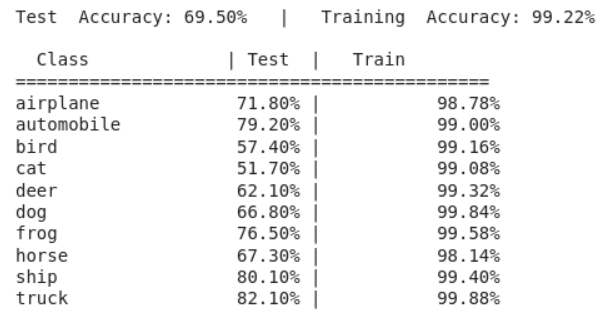

Rèsultats second CNN, 3 Conv + batch norm + weight decay 0,5 :⏭


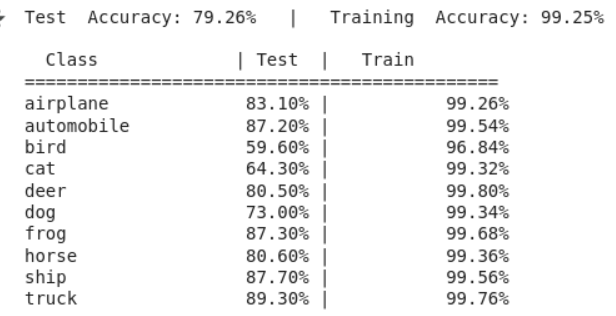

Rèsultats second CNN, 4 Conv + hidd + batch norm + weight decay 0,4 :⏭

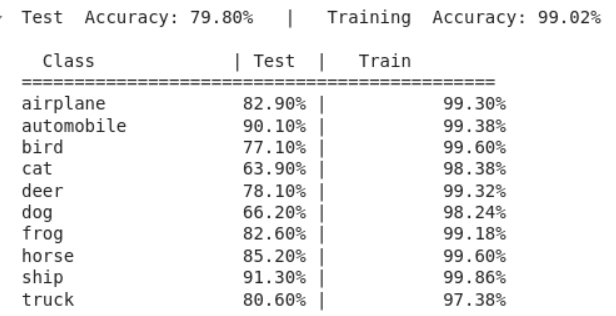

Rèsultats RESNET50 :⏭


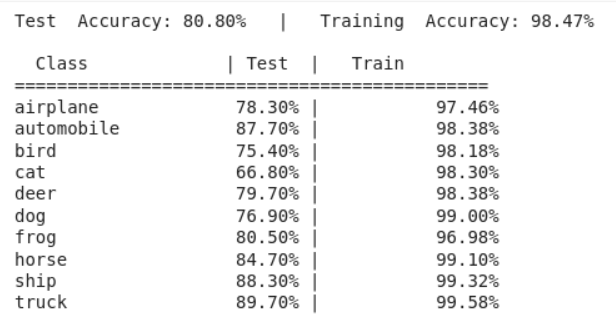

Rèsultats second CNN, 5 Conv + hidd + batch norm + weight decay 0,4 :⏭

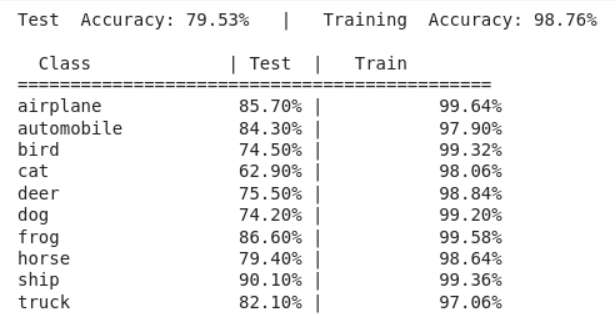

Rèsultats second CNN, 5 Conv + hidd + batch norm + weight decay 0,4  + data augmentation + 30 epochs:⏭

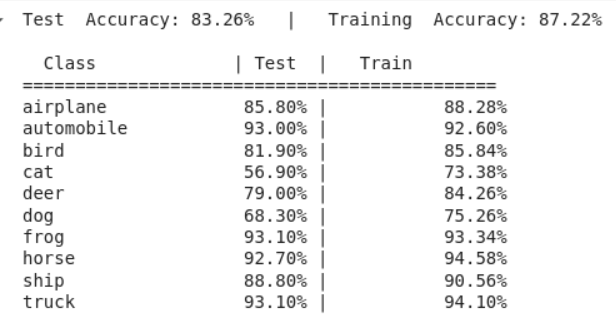

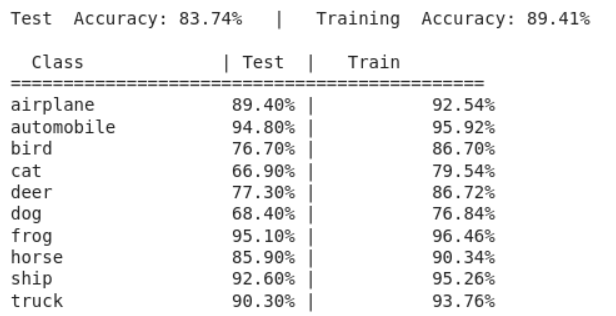

Rèsultats second CNN, 5 Conv + hidd + batch norm + compelx Kernels + data augmentation + 40 epochs:⏭

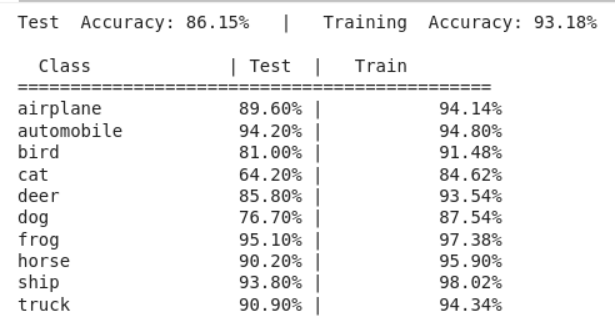

Rèsultats second CNN, 5 Conv + hidd + batch norm + compelx Kernels + data augmentation + 60 epochs:⏭

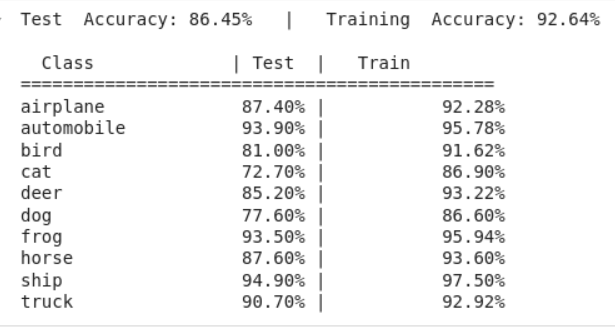